In [6]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [7]:
experiment_file = OUTPUTS_DIR / "estimate_effect_of_interleaver_conditional_entropy_variable_blocklen.json"

In [8]:
with open(experiment_file, "r") as e:
    results = json.load(e)

exp_results = pd.DataFrame([{**d["results"], **d["preamble"]["args"], "interleaver": "interleaver" in d["preamble"] }for d in results["data"]])

snr_vals = [2.0]
exp_results = exp_results[exp_results["snr"].isin(snr_vals)]
exp_results = exp_results[["ce__mean", "ce__err", "block_len", "encoder_name", "snr", "interleaver"]]

In [9]:
exp_results.head()

,ce__mean,ce__err,block_len,encoder_name,snr,interleaver
4,0.030513,0.000866,5,conv_15_7_00,2.0,True
5,0.043184,0.000954,5,conv_15_7_00,2.0,False
16,0.034011,0.000946,5,conv_75_1_00,2.0,True
17,0.043594,0.000994,5,conv_75_1_00,2.0,False
28,0.079897,0.001443,5,conv_56_1_11,2.0,True


/tmp/ipykernel_17775/2701947793.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


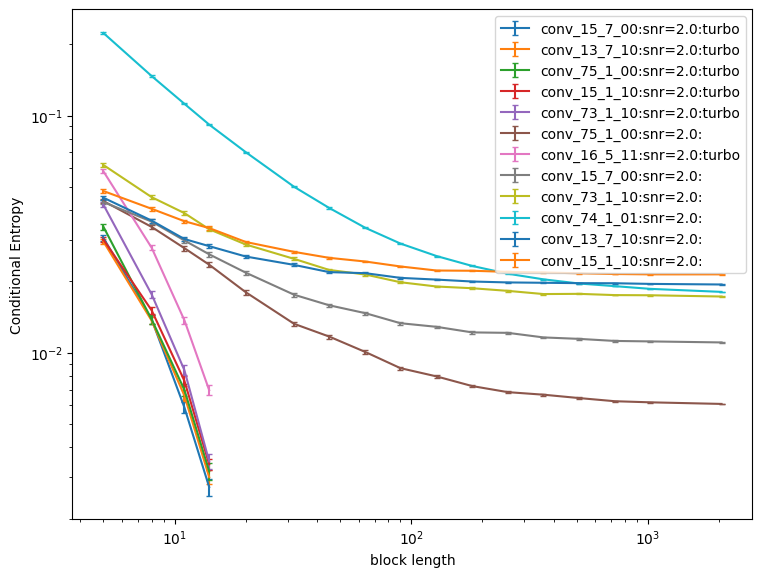

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

def final_ce(group):
    (encoder_name, snr, is_turbo), exp_result = group
    return exp_result.sort_values("block_len")["ce__mean"].iloc[-1]

num_turbo = 6
num_conv = 6
count_turbo = 0
count_conv = 0

for (encoder_name, snr, is_turbo), exp_result in sorted(exp_results.groupby(["encoder_name", "snr", "interleaver"]), key=final_ce):
    if is_turbo :
        if count_turbo >= num_turbo:
            continue
        else:
            count_turbo += 1
    else:
        if count_conv >= num_conv:
            continue
        else:
            count_conv += 1
    
    ax.errorbar(
        exp_result["block_len"], 
        exp_result["ce__mean"], 
        yerr=exp_result["ce__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"{encoder_name}:snr={snr}:{'turbo' if is_turbo else ''}"
    )
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('Conditional Entropy')

fig.show()